In [ ]:
import pandas as pd
import numpy as np


In [26]:
df = pd.read_excel("C:\\Users\\Cyber World\\Documents\\GitHub\\Online-retail-cluster-anlaysis\\online+retail\\Online Retail.xlsx")

In [27]:
df.head()  # Display the first few rows of the DataFrame

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [28]:
df.isnull().sum()  # Check for missing values in the DataFrame

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [29]:
df = df.dropna(subset=['CustomerID'])


In [ ]:
d

In [30]:
df.isnull().sum()  # Check for missing values in the DataFrame

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [31]:
df.describe(include='all')  # Get a summary of the DataFrame

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,406829.0,406829,406829,406829.000000,406829,406829.000000,406829.000000,406829
unique,22190.0,3684,3896,NaN,NaN,NaN,NaN,37
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,542.0,2077,2070,NaN,NaN,NaN,NaN,361878
mean,NaN,NaN,NaN,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,NaN
75%,NaN,NaN,NaN,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [32]:
df = df[df['Quantity'] > 0]


In [33]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [34]:
df = df[df['UnitPrice'] > 0]


In [35]:
df.describe()  # Get a statistical summary of the DataFrame

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


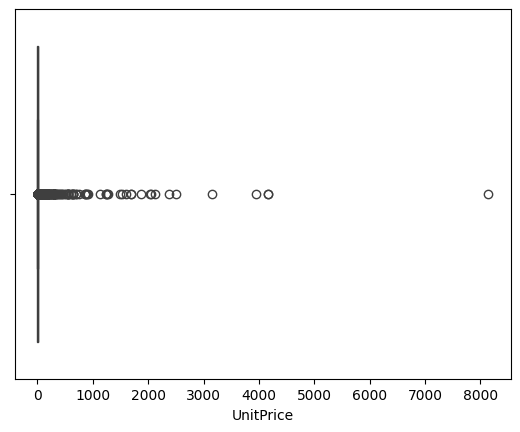

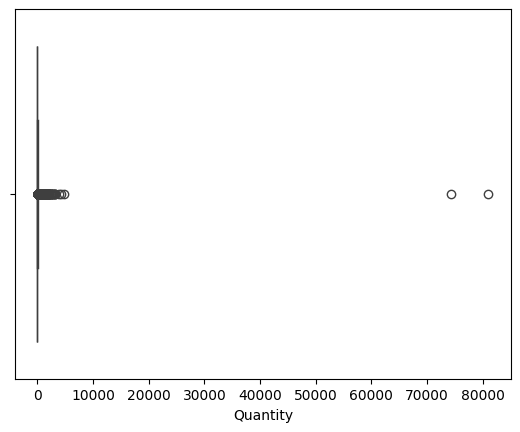

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['UnitPrice'])
plt.show()
sns.boxplot(x=df['Quantity'])
plt.show()


In [37]:
df.head()  # Display the first few rows of the DataFrame

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [38]:
# Function to remove outliers using IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Apply on Quantity
df = remove_outliers(df, 'Quantity')

# Apply on UnitPrice
df = remove_outliers(df, 'UnitPrice')


In [39]:
df.head()  # Display the first few rows of the DataFrame

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


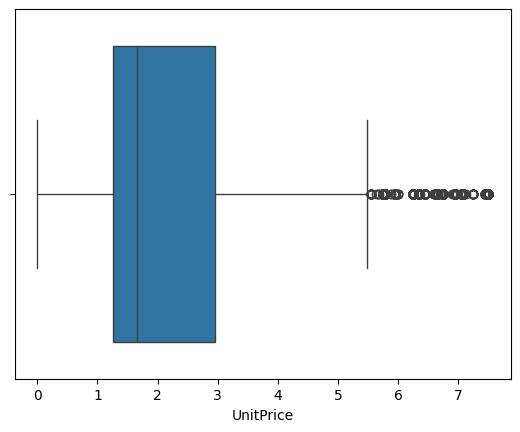

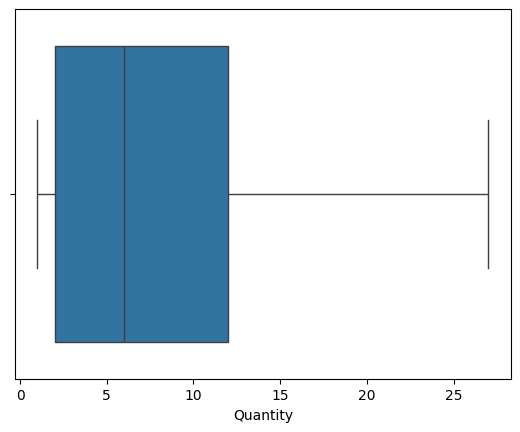

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=df['UnitPrice'])
plt.show()
sns.boxplot(x=df['Quantity'])   
plt.show()

In [43]:
df['UnitPrice'].describe(include='all')  # Get a statistical summary of the 'UnitPrice' column

count    338151.000000
mean          2.192017
std           1.544770
min           0.001000
25%           1.250000
50%           1.650000
75%           2.950000
max           7.500000
Name: UnitPrice, dtype: float64

In [56]:
Q1 = df['UnitPrice'].quantile(0.05)
Q3 = df['UnitPrice'].quantile(0.76)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1, " Q3:", Q3, " IQR:", IQR)
print("Lower bound:", lower_bound, " Upper bound:", upper_bound)


Q1: 0.42  Q3: 2.95  IQR: 2.5300000000000002
Lower bound: -3.3750000000000004  Upper bound: 6.745000000000001


In [57]:
outliers = df[(df['UnitPrice'] < lower_bound) | (df['UnitPrice'] > upper_bound)]
print("Number of UnitPrice outliers:", outliers.shape[0])


Number of UnitPrice outliers: 4704


In [58]:
df_clean = df[(df['UnitPrice'] >= lower_bound) & (df['UnitPrice'] <= upper_bound)]


In [60]:
df_clean['UnitPrice'].describe()  # Display the first few rows of the cleaned DataFrame

count    333447.000000
mean          2.124764
std           1.446998
min           0.001000
25%           1.250000
50%           1.650000
75%           2.950000
max           6.720000
Name: UnitPrice, dtype: float64

In [61]:
df_clean.dtypes  # Check the data types of the cleaned DataFrame

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [62]:
# Convert CustomerID to integer (nullable) if required
df['CustomerID'] = df['CustomerID'].astype('Int64')   # allows NaN  




C:\Users\Cyber World\AppData\Local\Temp\ipykernel_16344\52395417.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])


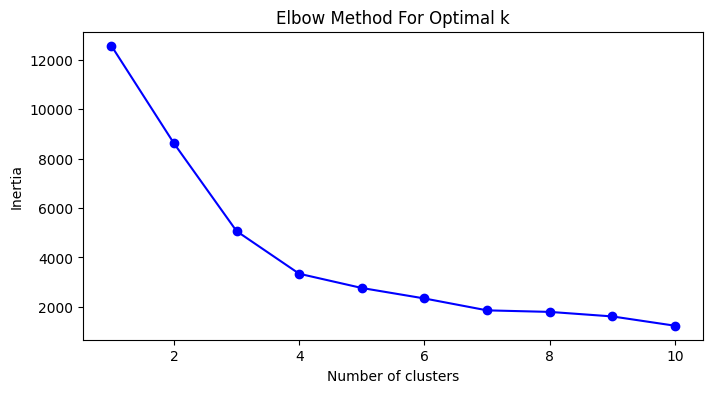

        Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          44.2      62.5    817.5  2869
1           2.0    5124.2  43682.5     4
2         248.3      24.6    310.9  1033
3          14.8     395.6   5184.3   285


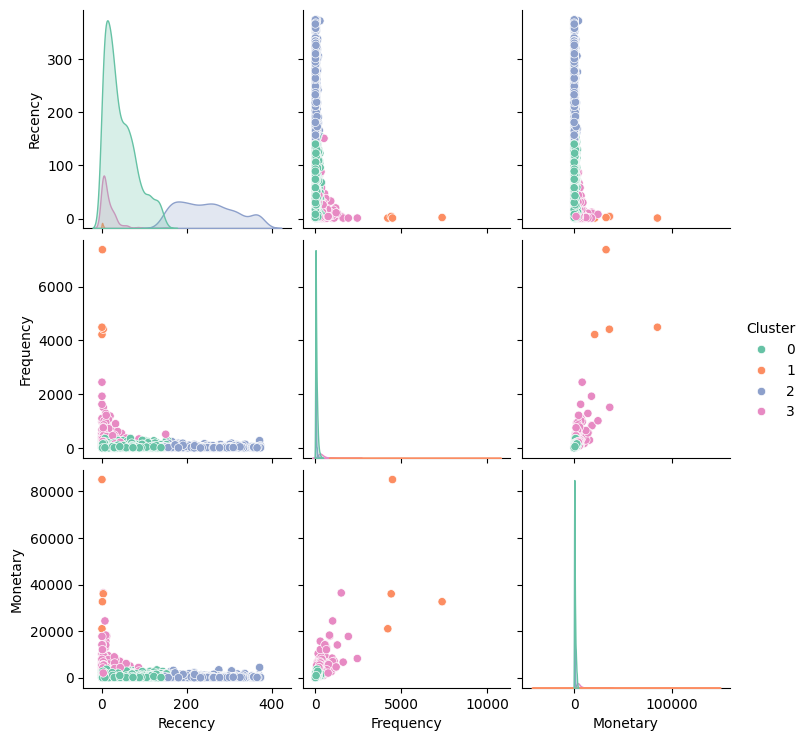

In [63]:
# 1. Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
snapshot_date = df_clean['InvoiceDate'].max() + pd.Timedelta(days=1)  # The day after last invoice

rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'UnitPrice': lambda x: (x * df.loc[x.index, 'Quantity']).sum()  # Monetary
})

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'UnitPrice': 'Monetary'
}, inplace=True)

# Optional: Remove customers with Monetary=0
rfm = rfm[rfm['Monetary'] > 0]

# 4. Scale the features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# 5. Decide number of clusters using Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# 6. Apply K-Means with chosen k (e.g., k=4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# 7. Analyze clusters
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean','count']
}).round(1)

print(cluster_summary)

# 8. Optional: Visualize clusters
sns.pairplot(rfm, vars=['Recency','Frequency','Monetary'], hue='Cluster', palette='Set2')
plt.show()


Cluster summary:
        Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          44.2      62.5    817.5  2869
1           2.0    5124.2  43682.5     4
2         248.3      24.6    310.9  1033
3          14.8     395.6   5184.3   285


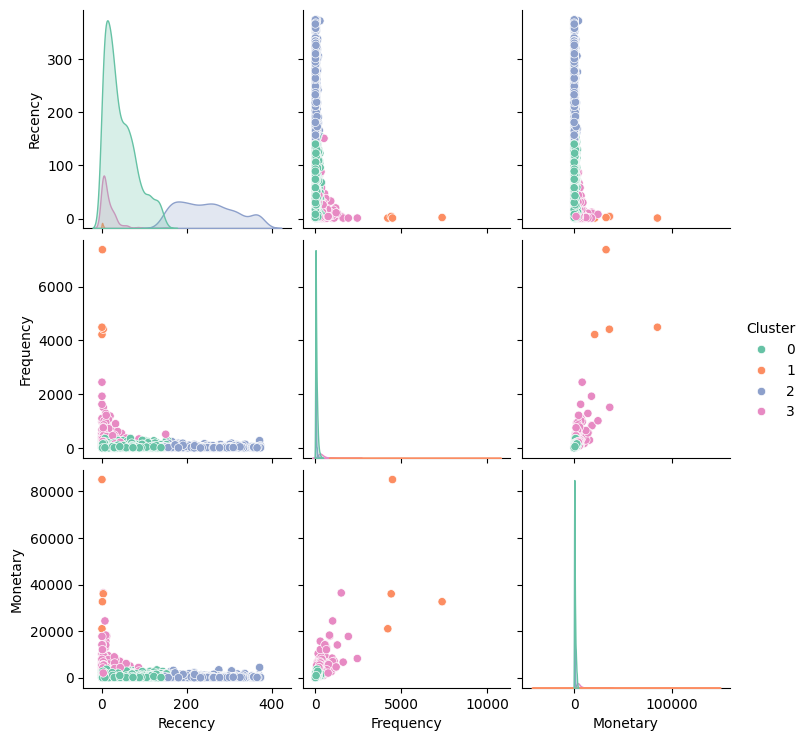

In [64]:
from sklearn.cluster import KMeans

# Apply K-Means with k=4
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analyze clusters
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean','count']
}).round(1)

print("Cluster summary:")
print(cluster_summary)

# Optional: visualize clusters
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(rfm, vars=['Recency','Frequency','Monetary'], hue='Cluster', palette='Set2')
plt.show()


In [66]:
df.shape

(338151, 9)